In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sb
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample

In [2]:
data = pd.read_csv('bank-full.csv', header=0)
data

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."
...,...
45206,"51;""technician"";""married"";""tertiary"";""no"";825;..."
45207,"71;""retired"";""divorced"";""primary"";""no"";1729;""n..."
45208,"72;""retired"";""married"";""secondary"";""no"";5715;""..."
45209,"57;""blue-collar"";""married"";""secondary"";""no"";66..."


In [3]:
data.columns

Index(['age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"'], dtype='object')

In [4]:
# Rearranging Data & Cleaning
data = data['age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"']

data = data.str.split(';', expand=True)

data.columns = ['age', 'job', 'marital', 'education', 'default','balance', 'housing', 'loan','contact', 'day', 'month', 'duration', 'campaign', 'pdays','previous', 'poutcome', 'y']

def replaceSpecialCharacters(str):
    return str.replace('"', '')

data = data.applymap(replaceSpecialCharacters)

data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
data.describe().T

,count,unique,top,freq
age,45211,77,32,2085
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
balance,45211,7168,0,3514
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
day,45211,31,20,2752


In [6]:
# Changing columns to appropriate datatype
int_cols=["age","balance", "day", "duration","campaign","pdays","previous"]

for i in int_cols:
    data[i]=data[i].astype("int64")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.1+ MB


In [7]:
# Checking for missing data
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
# Checking for unknown data
cat_cols=data.select_dtypes(['object']).columns
print(cat_cols)

for i in (cat_cols):
    print( 'Categorical Column Name :-',i,'\n')
    print('No of Categories in :-',i,'\n' '\n',data[i].value_counts(), '\n')
    print('Percentage of Each Category in', i,'\n',data[i].value_counts(normalize =True).mul(100).round(2),'\n')

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')
Categorical Column Name :- job 

No of Categories in :- job 

 blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 

Percentage of Each Category in job 
 blue-collar      21.53
management       20.92
technician       16.80
admin.           11.44
services          9.19
retired           5.01
self-employed     3.49
entrepreneur      3.29
unemployed        2.88
housemaid         2.74
student           2.07
unknown           0.64
Name: job, dtype: float64 

Categorical Column Name :- marital 

No of Categories in :- marital 

 married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 

Percentage of Ea

In [9]:
# Fixing unknown values (deletion of unknown data)
data.drop(data[data['job'] == 'unknown' ].index , inplace=True)
data.drop(data[data['marital'] == 'unknown' ].index , inplace=True)
data.drop(data[data['education'] == 'unknown' ].index , inplace=True)
data.drop(data[data['default'] == 'unknown' ].index , inplace=True)
data.drop(data[data['housing'] == 'unknown' ].index , inplace=True)
data.drop(data[data['loan'] == 'unknown' ].index , inplace=True)

In [10]:
# Checking for Outliers & Skewness
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,43193.0,40.764082,10.512640,18.0,33.0,39.0,48.0,95.0
balance,43193.0,1354.027342,3042.103625,-8019.0,71.0,442.0,1412.0,102127.0
day,43193.0,15.809414,8.305970,1.0,8.0,16.0,21.0,31.0
duration,43193.0,258.323409,258.162006,0.0,103.0,180.0,318.0,4918.0
campaign,43193.0,2.758178,3.063987,1.0,1.0,2.0,3.0,58.0
pdays,43193.0,40.404070,100.420624,-1.0,-1.0,-1.0,-1.0,871.0
previous,43193.0,0.584863,2.332672,0.0,0.0,0.0,0.0,275.0


Age: Looks normal/reasonable. Balance: Completely skewed with outliers. Day: Looks normal/reasonable. Duration: Completely skewed with outliers. Campaign: Completely skewed with outliers. Pdays: Potential issue. Previous: Completely skewed with outliers. It is worth noting that despite being outliers, these values are crucial as the data is sensitive which means the outliers could provide useful information.

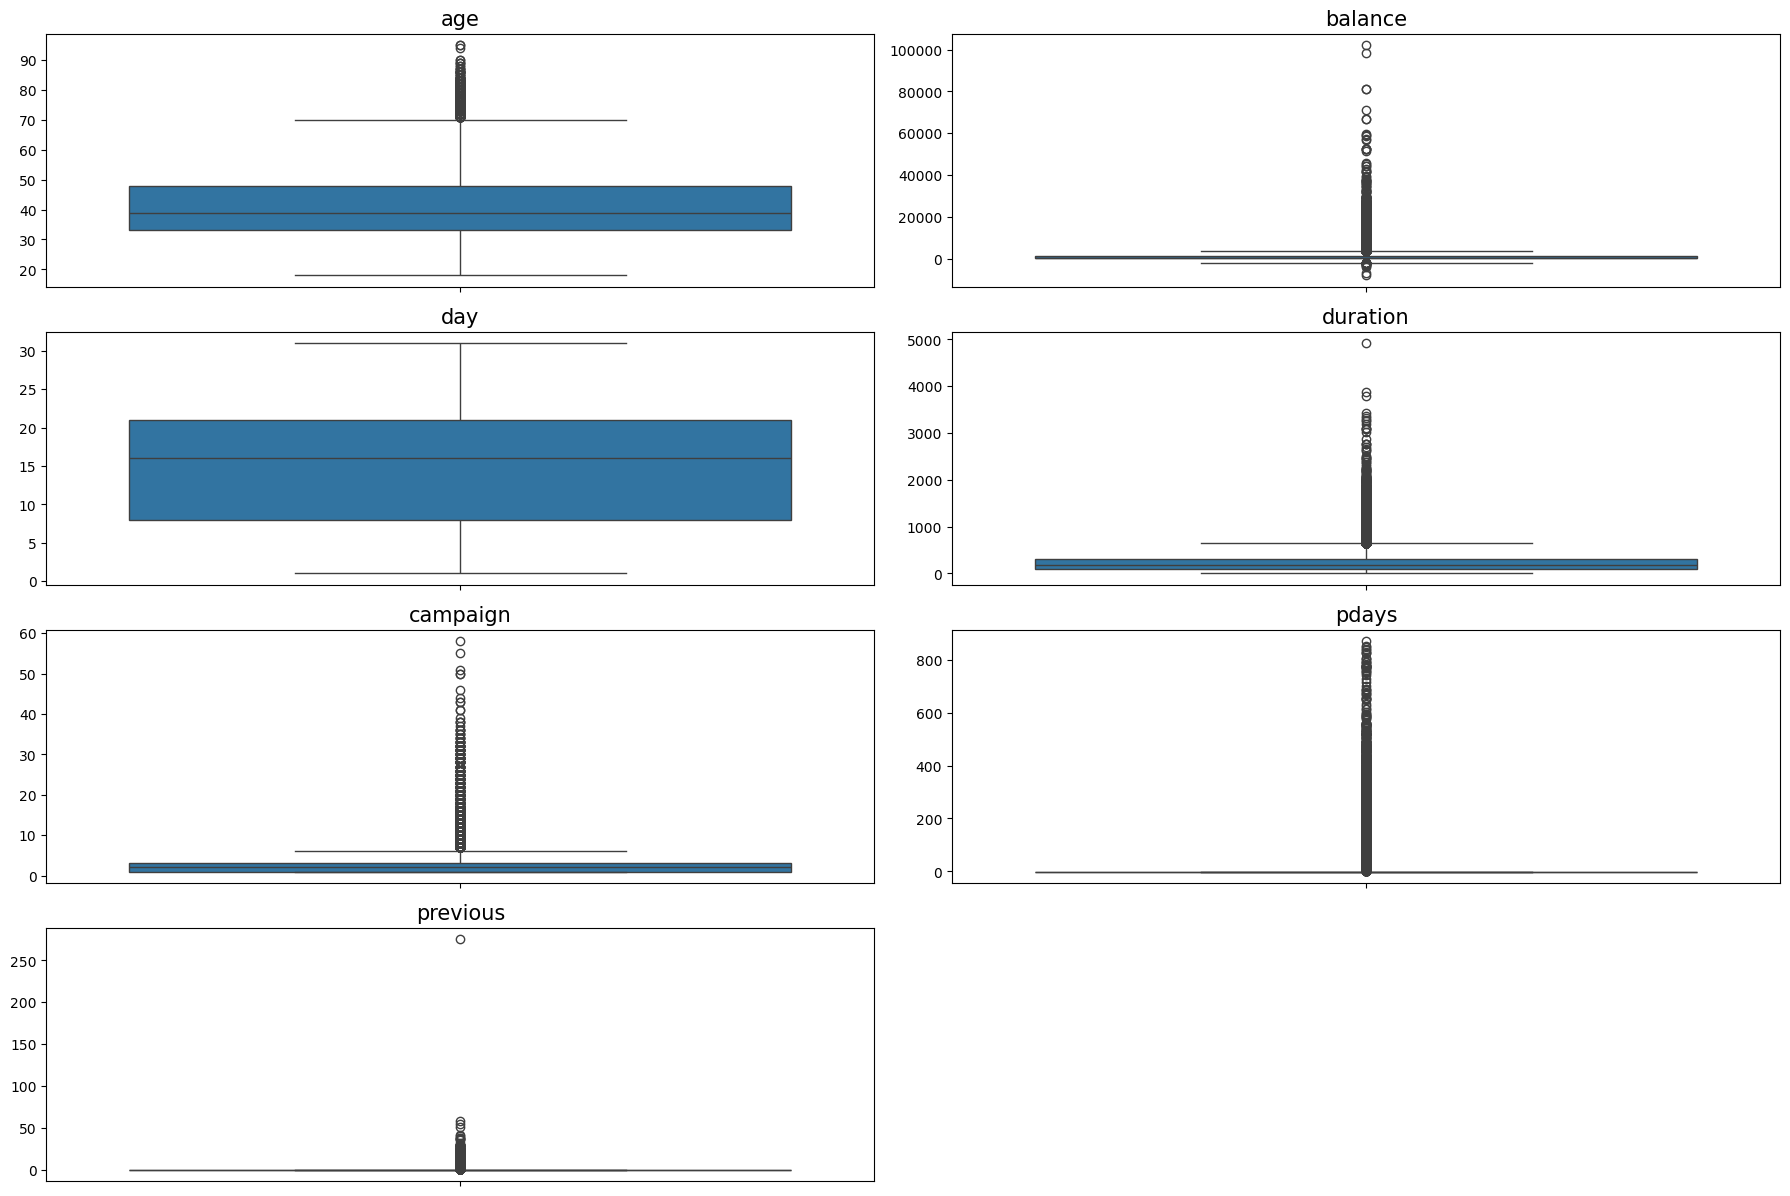

In [11]:
# Alternative method for checking for outliers and skewness
fig, ax = plt.subplots(5, 2, figsize=(18, 15))
count = 0
cols = data.select_dtypes(include=np.number).columns
total_cols = len(cols)

for i in range(5):
    for j in range(2):
        if count < total_cols:
            s = cols[count]
            sb.boxplot(data[s].values, ax=ax[i][j], orient='vertical')
            ax[i][j].set_title(s, fontsize=15)
            count += 1
        else:
            fig.delaxes(ax[i][j])

fig.set_size_inches(18, 15)
plt.tight_layout()
plt.show()


Similar results as above: We see outliers & skewness in balance, duration, campaign, and previous.

In [12]:
# Alternative method for checking for skewness
for i in int_cols:
    print(f"Skewness {i} : " + str(data[i].skew()))

Skewness age : 0.6978356364509636
Skewness balance : 8.400120937754398
Skewness day : 0.08979984840490052
Skewness duration : 3.1701799697784785
Skewness campaign : 4.7924941810208885
Skewness pdays : 2.608337543002269
Skewness previous : 42.08877792244101


Values that are not near 0 are considered skewed as 0 represents symmetrical distribution.

``````````````````````````````````````````Exploratory Data Analysis``````````````````````````````````````````

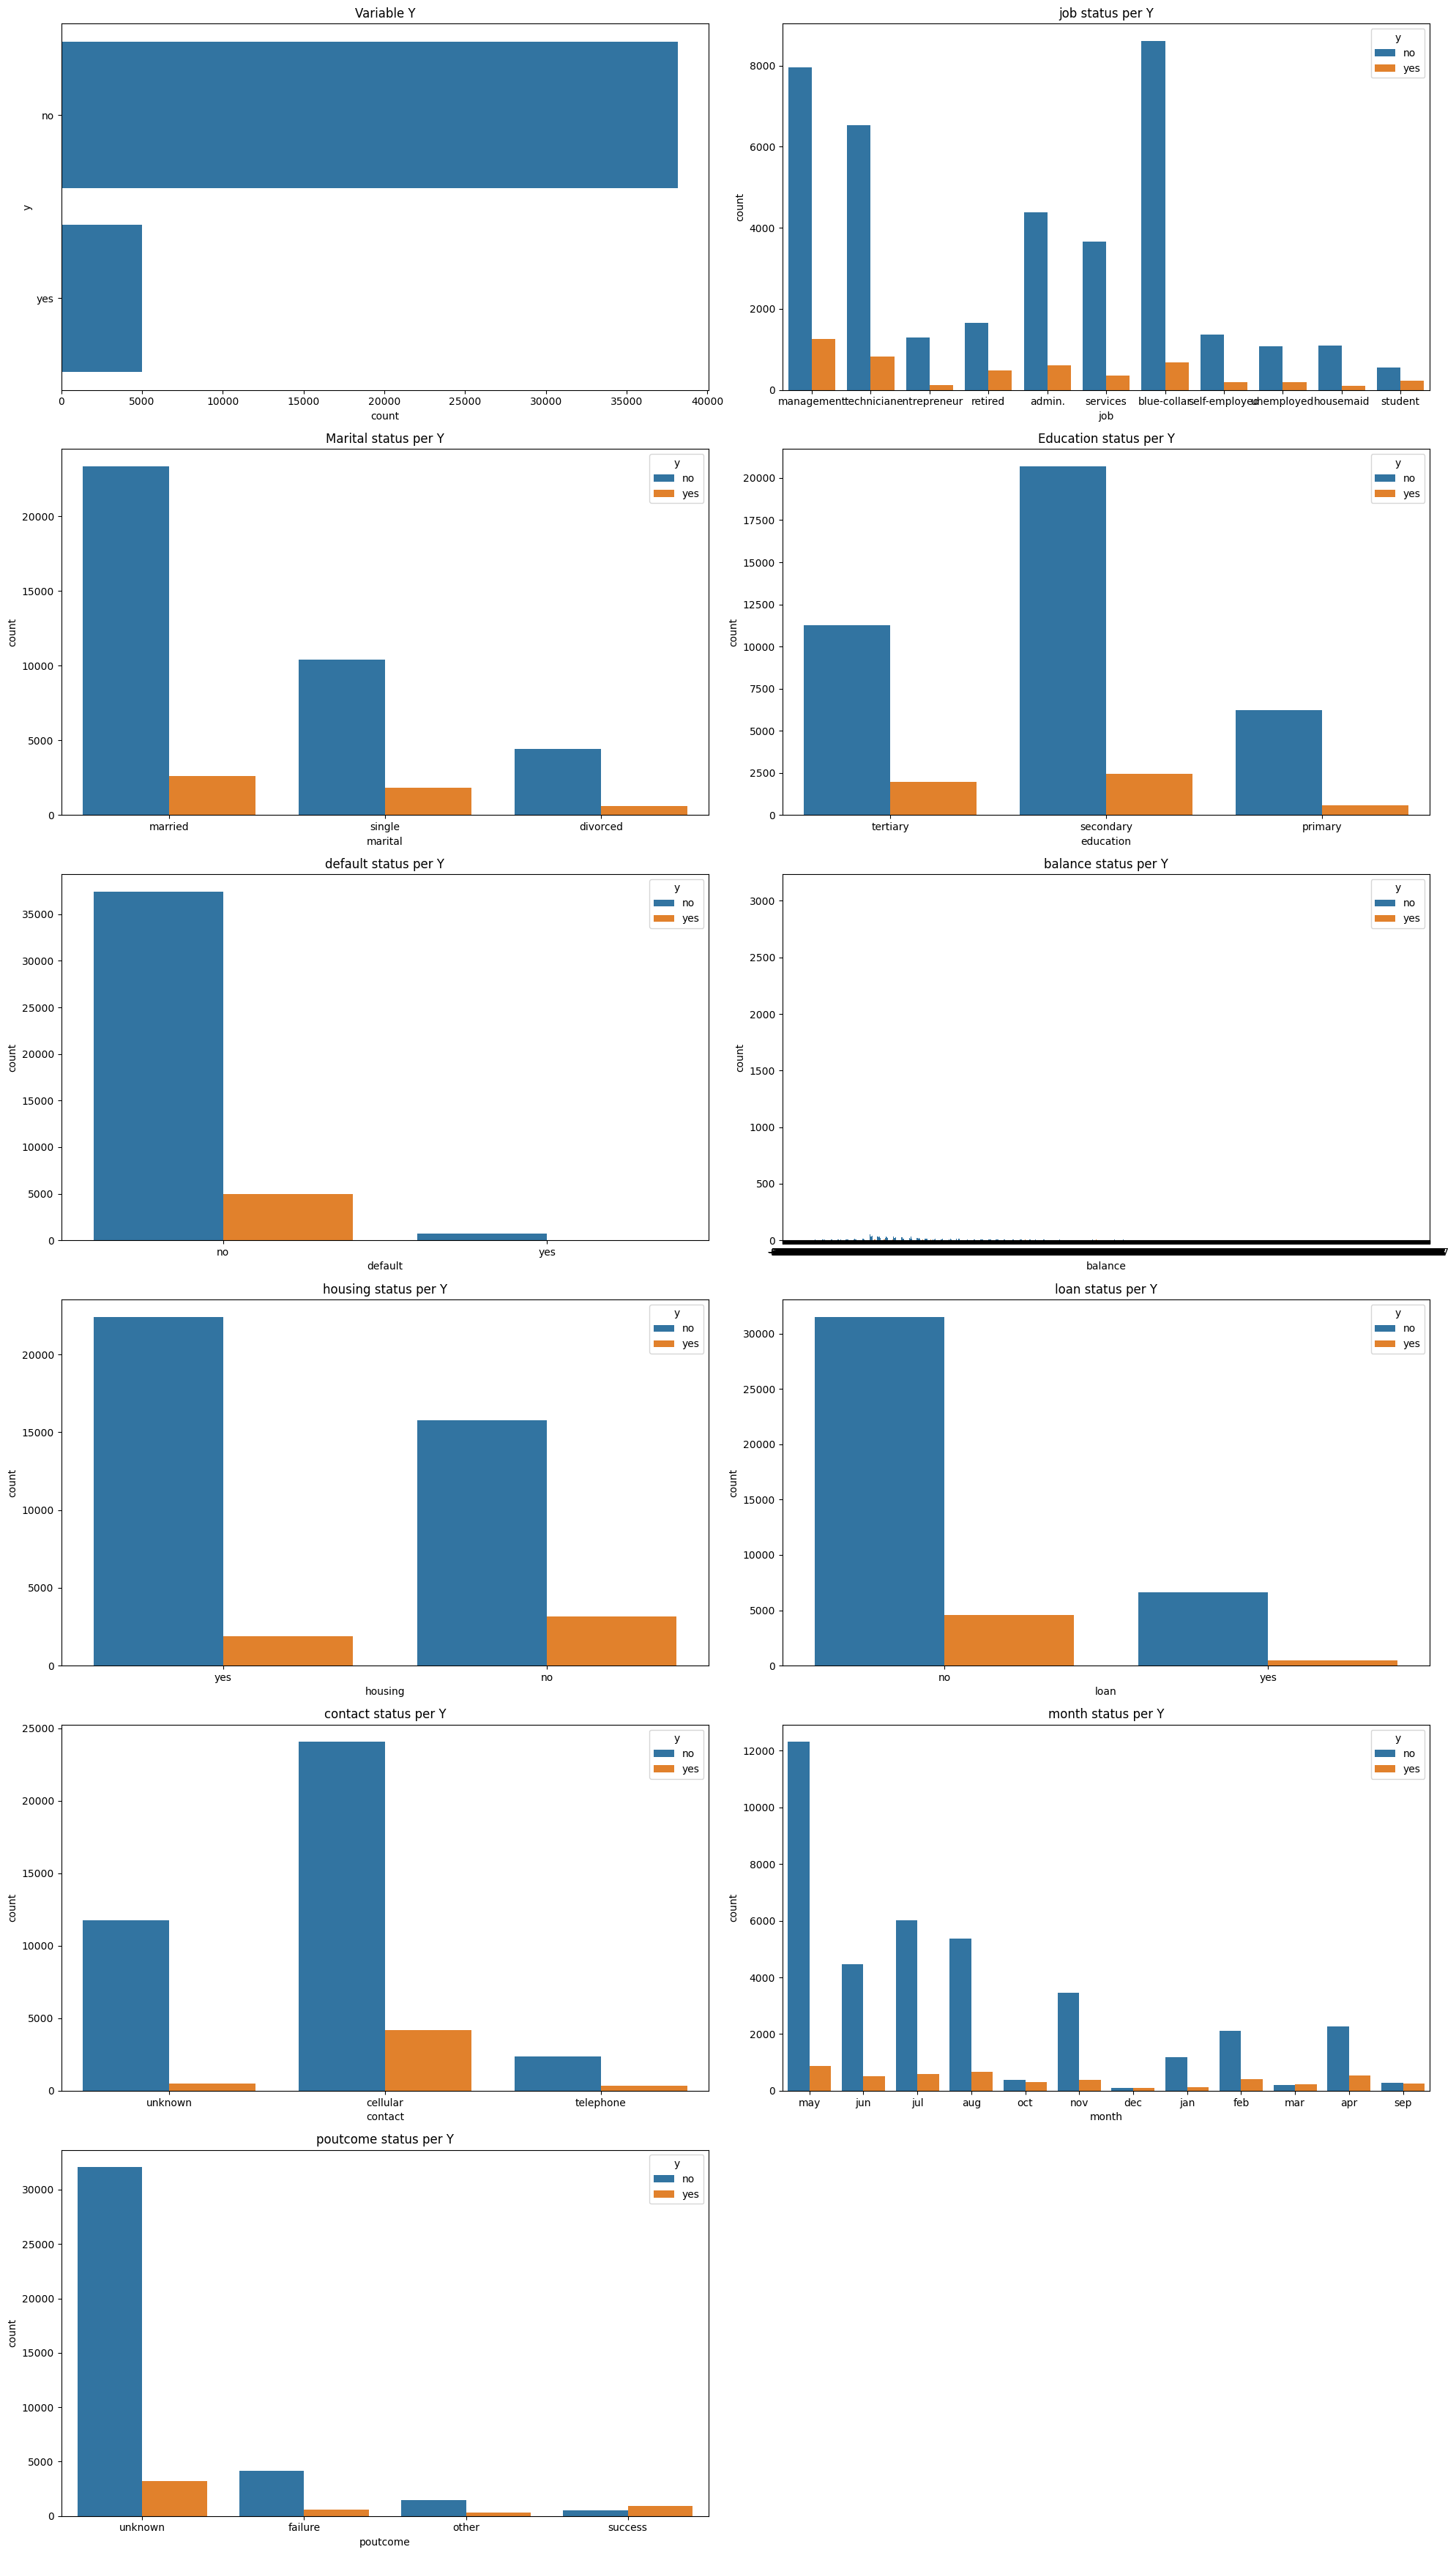

In [13]:
# Variables visualization (Categorical)

plt.figure(figsize=(20,35))

plt.subplot(6,2,1)
plt.title('Variable Y')
sb.countplot(data.y)

plt.subplot(6,2,2)
plt.title('job status per Y')
sb.countplot(data=data, x='job', hue='y')

plt.subplot(6,2,3)
plt.title('Marital status per Y')
sb.countplot(data=data, x='marital', hue='y')

plt.subplot(6,2,4)
plt.title('Education status per Y')
sb.countplot(data=data, x='education', hue='y')

plt.subplot(6,2,5)
plt.title('default status per Y')
sb.countplot(data=data, x='default', hue='y')

plt.subplot(6,2,6)
plt.title('balance status per Y')
sb.countplot(data=data, x='balance', hue='y')

plt.subplot(6,2,7)
plt.title('housing status per Y')
sb.countplot(data=data, x='housing', hue='y')

plt.subplot(6,2,8)
plt.title('loan status per Y')
sb.countplot(data=data, x='loan', hue='y')

plt.subplot(6,2,9)
plt.title('contact status per Y')
sb.countplot(data=data, x='contact', hue='y')

plt.subplot(6,2,10)
plt.title('month status per Y')
sb.countplot(data=data, x='month', hue='y')

plt.subplot(6,2,11)
plt.title('poutcome status per Y')
sb.countplot(data=data, x='poutcome', hue='y')

plt.tight_layout()
plt.show()

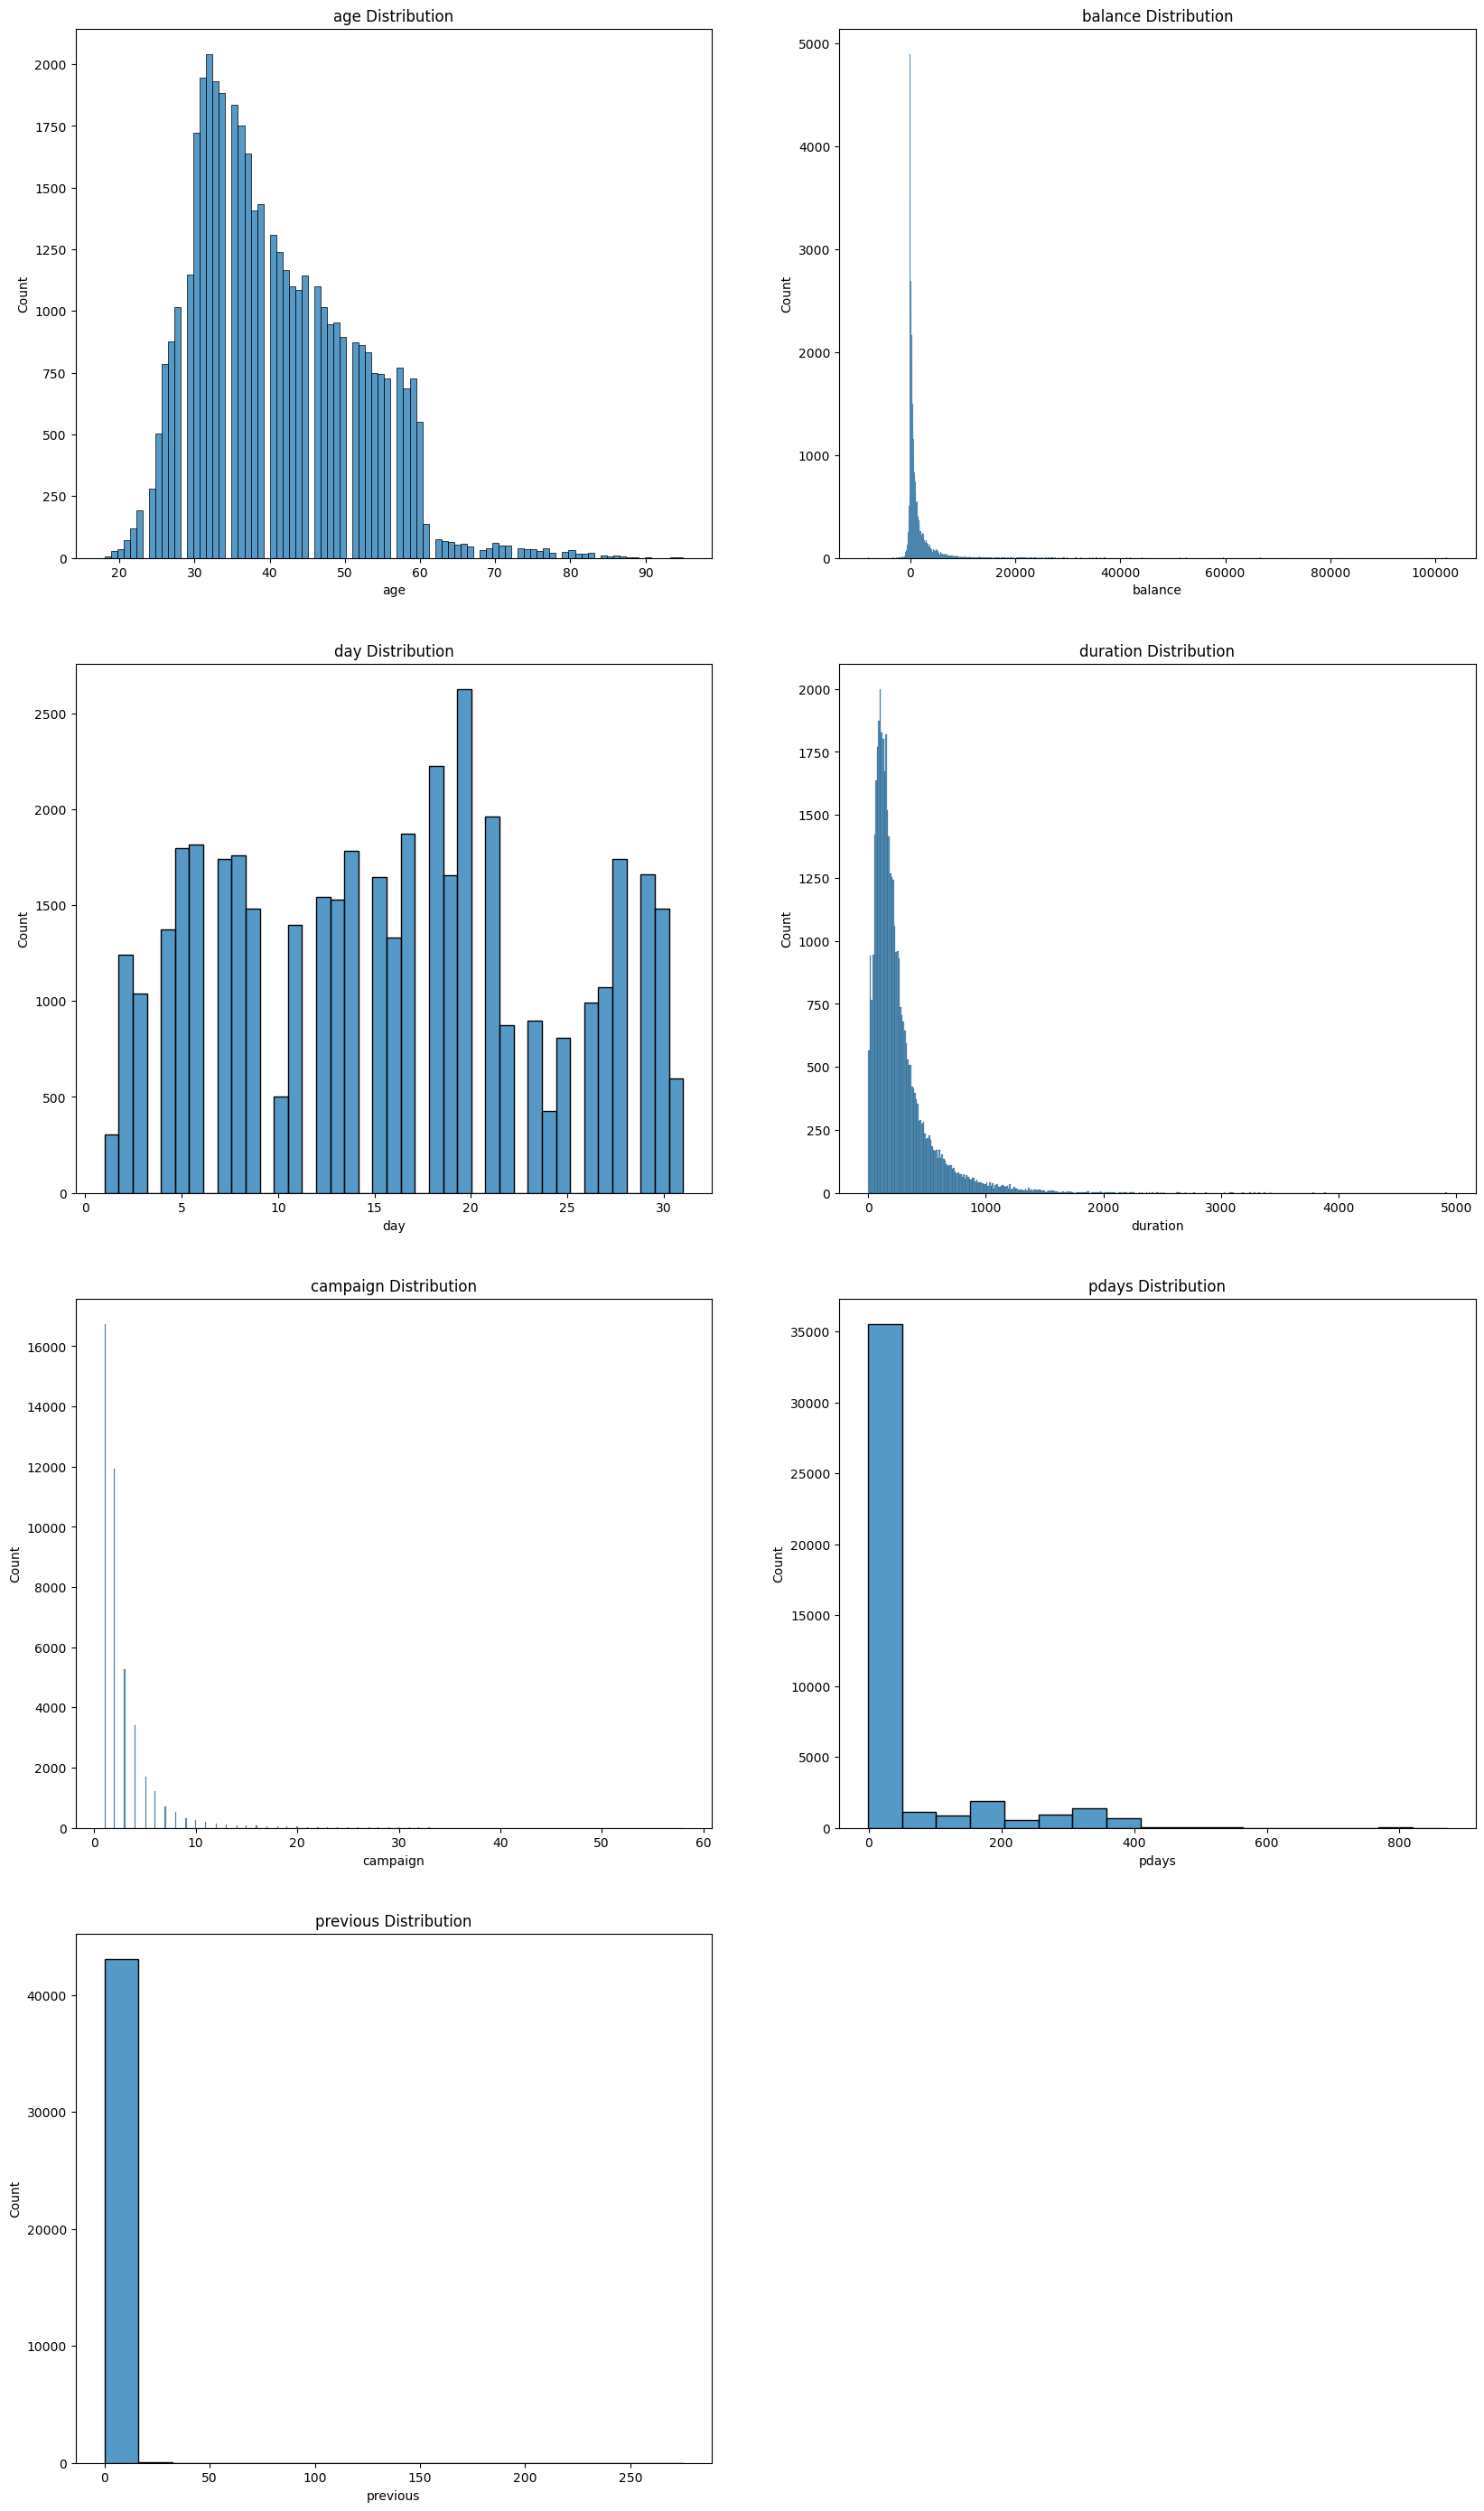

In [14]:
# Variable Visualization (Numerical)

plt.figure(figsize=(20,35))

plt.subplot(4,2,1)
plt.title('age Distribution')
sb.histplot(data.age)

plt.subplot(4,2,2)
plt.title('balance Distribution')
sb.histplot(data.balance)

plt.subplot(4,2,3)
plt.title('day Distribution')
sb.histplot(data.day)

plt.subplot(4,2,4)
plt.title('duration Distribution')
sb.histplot(data.duration)

plt.subplot(4,2,5)
plt.title('campaign Distribution')
sb.histplot(data['campaign'])

plt.subplot(4,2,6)
plt.title('pdays Distribution')
sb.histplot(data.pdays)

plt.subplot(4,2,7)
plt.title('previous Distribution')
sb.histplot(data['previous'])

plt.show()

In [15]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


<AxesSubplot:>

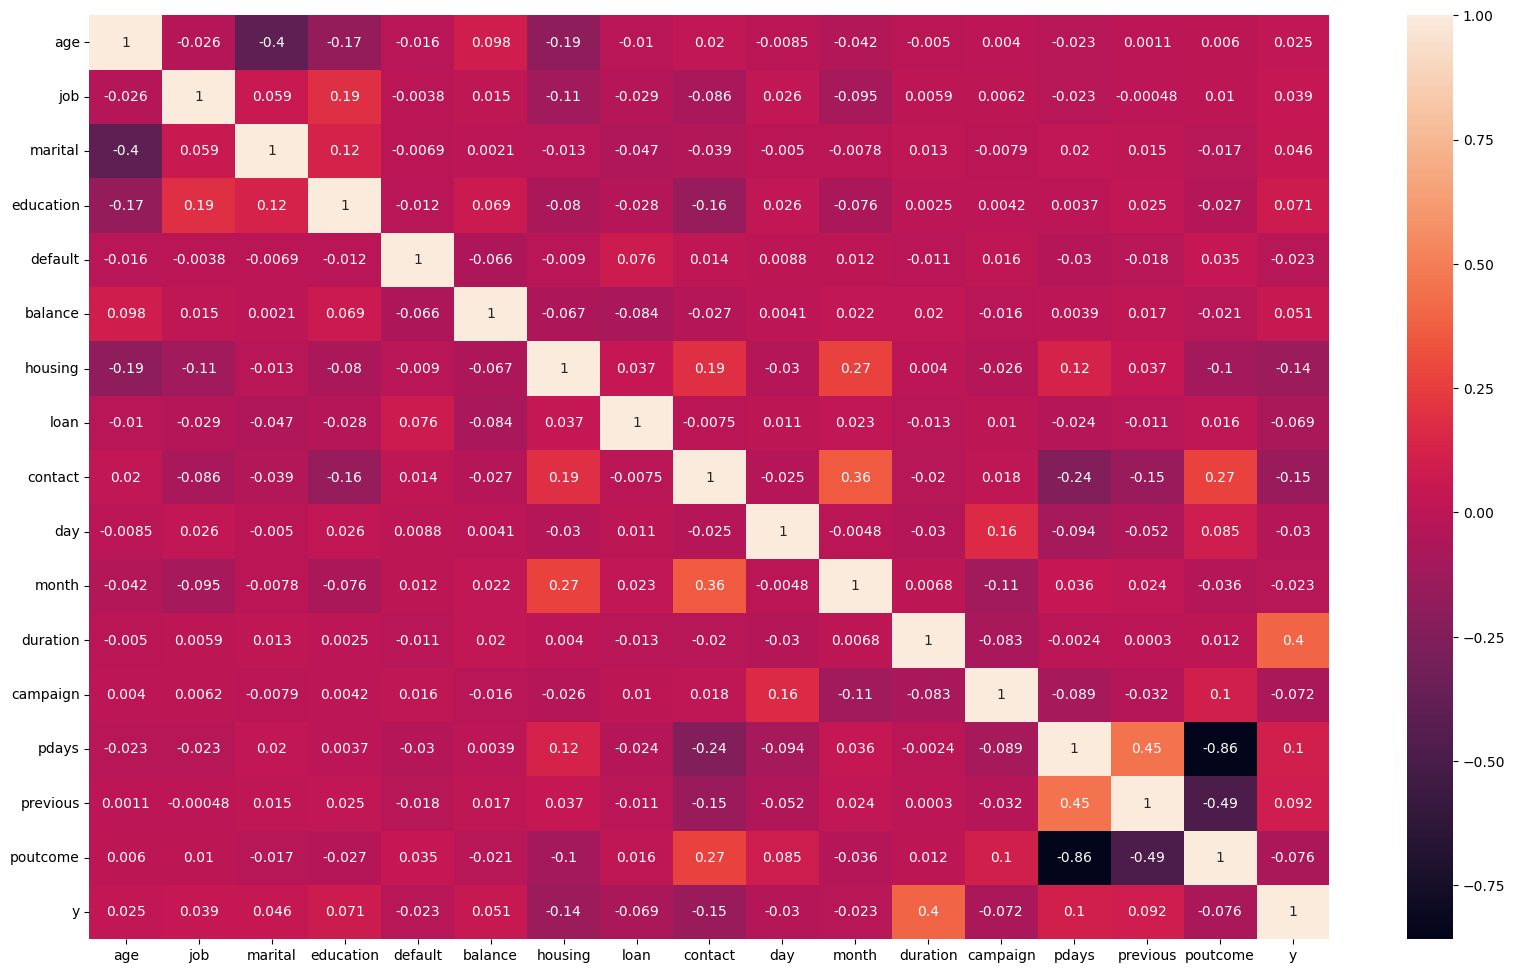

In [16]:
# Correlations

# Converting categorial into numerical
labelencoder_X = LabelEncoder()
data['y']=labelencoder_X.fit_transform(data['y'])
cat_col=data.select_dtypes(include='object').columns
for i in cat_col:
    data[i]=labelencoder_X.fit_transform(data[i])
    
# Correlation Plot
plt.figure(figsize=(20, 12))
sb.heatmap(data.corr(),annot=True)

In [17]:
(data.corr()**2)["y"].sort_values(ascending = False)[1:]

duration     0.157921
contact      0.021171
housing      0.019127
pdays        0.010291
previous     0.008421
poutcome     0.005784
campaign     0.005251
education    0.005030
loan         0.004734
balance      0.002641
marital      0.002093
job          0.001546
day          0.000915
age          0.000613
default      0.000540
month        0.000532
Name: y, dtype: float64

Duration is significantly more correlated than the other variables. From the Data Cleaning & Checking section, we learned that duration has outliers and is skewed. Let's fix that:

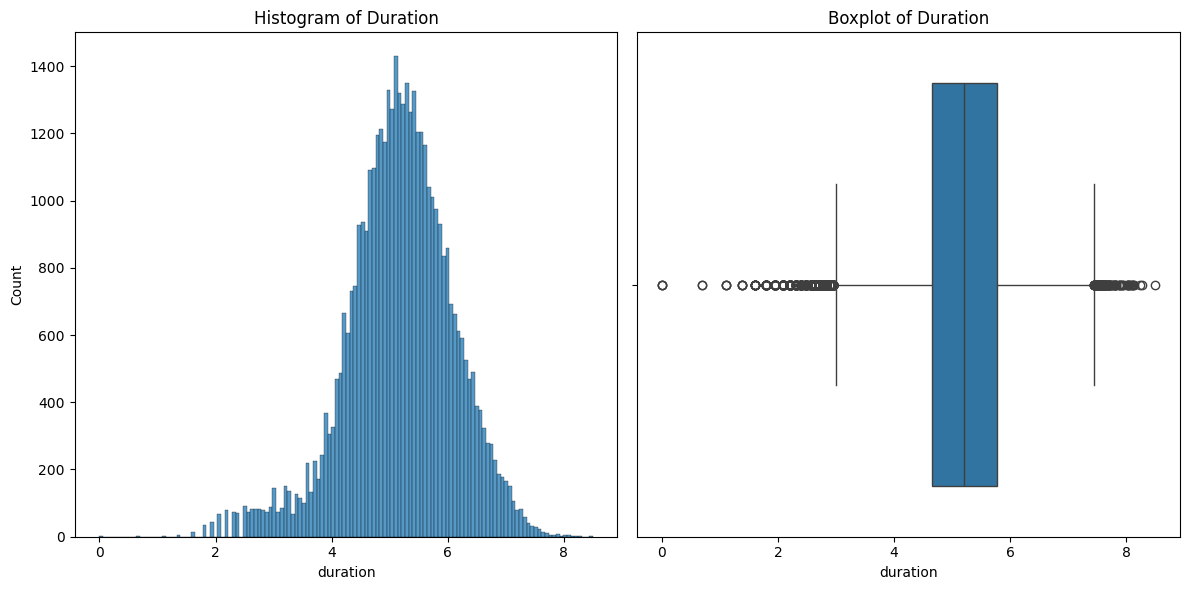

In [18]:
# Fixing outliers and skewness in duration
data["duration"] = np.log1p(data["duration"])

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sb.histplot(data=data, x='duration', ax=axes[0])
axes[0].set_title('Histogram of Duration')

sb.boxplot(data=data, x='duration', ax=axes[1])
axes[1].set_title('Boxplot of Duration')

plt.tight_layout()
plt.show()

In [19]:
# Normalizing pdays for visualization (for presentation)
#data["pdays"] = np.log1p(data["pdays"])

#fig, axes = plt.subplots(1, 2, figsize=(12, 6))
#sb.histplot(data=data, x='pdays', ax=axes[0])
#axes[0].set_title('Histogram of pdays')

#sb.boxplot(data=data, x='pdays', ax=axes[1])
#axes[1].set_title('Boxplot of pdays')

#plt.tight_layout()
#plt.show()

In [20]:
# Balancing Y variable

data_majority = data[data['y'] == 0]
data_minority = data[data['y'] == 1]
data_minority_upsampled = resample(data_minority, replace=True, n_samples=len(data_majority), random_state=1) 
data_balanced = pd.concat([data_majority, data_minority_upsampled])
data_balanced['y'].value_counts()

0    38172
1    38172
Name: y, dtype: int64

In [34]:
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.model_selection import train_test_split # to split the dataset for training and testing 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
%pip install xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [45]:
#Split data
x = data_balanced.iloc[:, :-1].values
y = data_balanced.iloc[:, 16].values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state=1)

#Logistic regression
model_lr = LogisticRegression()
model_lr.fit(x_train,y_train)
prediction = model_lr.predict(x_test)
print(metrics.classification_report(y_test,prediction))
accuracy = metrics.accuracy_score(y_test,prediction)
print("Acurracy of Logistic Regression:", (accuracy * 100))

/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.75      0.66      0.70     11456
           1       0.70      0.78      0.74     11448

    accuracy                           0.72     22904
   macro avg       0.72      0.72      0.72     22904
weighted avg       0.72      0.72      0.72     22904

Acurracy of Logistic Regression: 72.03981837233671


In [46]:
#Decision Tree Classifier
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train,y_train)
prediction = model_dt.predict(x_test)
print(metrics.classification_report(y_test,prediction))
accuracy = metrics.accuracy_score(y_test,prediction)
print("Acurracy of Decision Tree: ", (accuracy * 100))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     11456
           1       0.92      1.00      0.96     11448

    accuracy                           0.96     22904
   macro avg       0.96      0.96      0.96     22904
weighted avg       0.96      0.96      0.96     22904

Acurracy of Decision Tree:  95.81732448480615


In [ ]:
#Random Forest Classifier
model_rf = RandomForestClassifier()
model_rf.fit(x_train,y_train)
prediction = model_rf.predict(x_test)
print(metrics.classification_report(y_test,prediction))
accuracy = metrics.accuracy_score(y_test,prediction)
print("Acurracy of Random Forest:", (accuracy * 100))

In [43]:
#XGBoost 
model_xgb = XGBClassifier()
model_xgb.fit(x_train,y_train)
prediction = model_xgb.predict(x_test)
print(metrics.classification_report(y_test,prediction))
accuracy = metrics.accuracy_score(y_test,prediction)
print("accuracy of XGBoost:", (accuracy * 100))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92     11456
           1       0.89      0.96      0.93     11448

    accuracy                           0.92     22904
   macro avg       0.93      0.92      0.92     22904
weighted avg       0.93      0.92      0.92     22904

accuracy of XGBoost: 92.44673419490046


In [44]:
#AdaBoost Classifier
model_ab = AdaBoostClassifier()
model_ab.fit(x_train,y_train)
prediction = model_ab.predict(x_test)
print(metrics.classification_report(y_test,prediction))
accuracy = metrics.accuracy_score(y_test,prediction)
print("accuracy of AdaBoostClassifier:", (accuracy * 100))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84     11456
           1       0.84      0.83      0.84     11448

    accuracy                           0.84     22904
   macro avg       0.84      0.84      0.84     22904
weighted avg       0.84      0.84      0.84     22904

accuracy of AdaBoostClassifier: 83.7190010478519
